In [1]:
import numpy as np
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
ss = pd.read_csv('SampleSuperstore.csv')
ss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
ss.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
# checking for the shape 
ss.shape

(9994, 13)

In [5]:
# checking for the duplicates
ss.duplicated().sum()

17

In [6]:
## Dropping these duplicates
ss.drop_duplicates(keep='last', inplace=True)

### Checking columns for nulls or any unwanted entries

In [7]:
ss['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
ss['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
ss['Country'].unique()

array(['United States'], dtype=object)

In [10]:
ss['City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [11]:
ss['State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [12]:
ss['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [13]:
ss['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
ss['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
ss.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Dropping unwanted Columns :-
1. Country
2. Postal-Code

In [16]:
ss.shape

(9977, 13)

In [17]:
ss = ss.drop(['Country','Postal Code'], axis=1)
ss.shape

(9977, 11)

In [18]:
ss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Analyzing ship mode

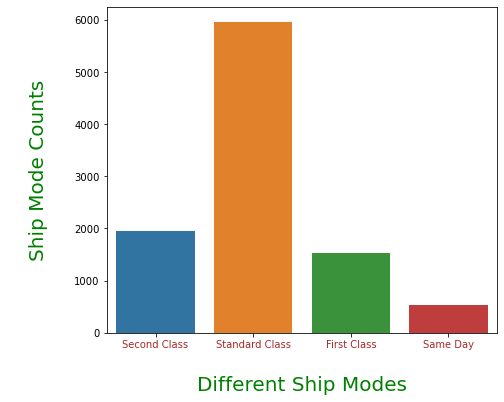

In [19]:
plt.figure(figsize=[7,6])
sns.countplot(ss['Ship Mode'])
plt.xlabel("\nDifferent Ship Modes", color='g',fontsize=20)
plt.ylabel("\nShip Mode Counts\n", color='g',fontsize=20)
plt.xticks(color='brown', size=10)
plt.show()

In [20]:
l_data = ss[ (ss.Profit<0) ]
l_data.shape

(1869, 11)

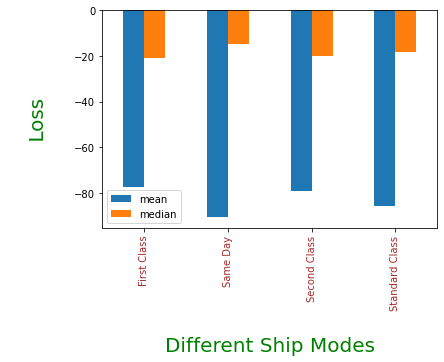

In [21]:
l_data.groupby(['Ship Mode']).agg(['mean','median'])['Profit'].plot.bar()
plt.xlabel("\nDifferent Ship Modes", color='g',fontsize=20)
plt.ylabel("\n Loss \n", color='g',fontsize=20)
plt.xticks(color='brown', size=10)
plt.show()
plt.show()

## So this shows that the loss making products where those which are shipped on the same day

In [22]:
(l_data.groupby(['Ship Mode'])['Profit']).mean()*-100 / l_data.groupby(['Ship Mode'])['Profit'].count()

## So this shows that the same day shipped data have 92% chances that they will make loss.......

Ship Mode
First Class       26.395498
Same Day          92.649994
Second Class      25.864129
Standard Class     7.304721
Name: Profit, dtype: float64

# Checking for outliers 

## 1. Quantity column

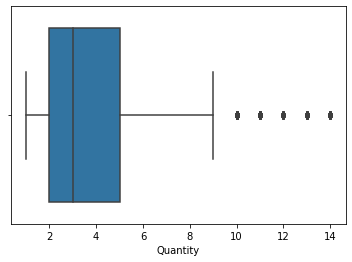

In [23]:
sns.boxplot(ss.Quantity)
plt.show()

In [24]:
## So in quantity column there is no outlier and no operation is needed 

## 2. Sales column

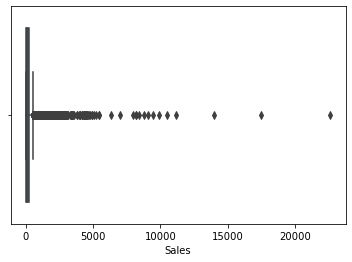

In [25]:
sns.boxplot(ss.Sales)
plt.show()

## here outliers are present so checking those entries which have sales > 10,000

In [26]:
ss[ss.Sales>10000]

# By seeing this data we can say that these are not fake entries 
# Yes, they are outliers but we can't drop them as they consist some value over the dataset. 


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2623,First Class,Home Office,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888
2697,Standard Class,Home Office,Jacksonville,Florida,South,Technology,Machines,22638.480,6,0.5,-1811.0784
4190,Standard Class,Consumer,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
6826,Standard Class,Corporate,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808


## There are some products having high sales but loss making 

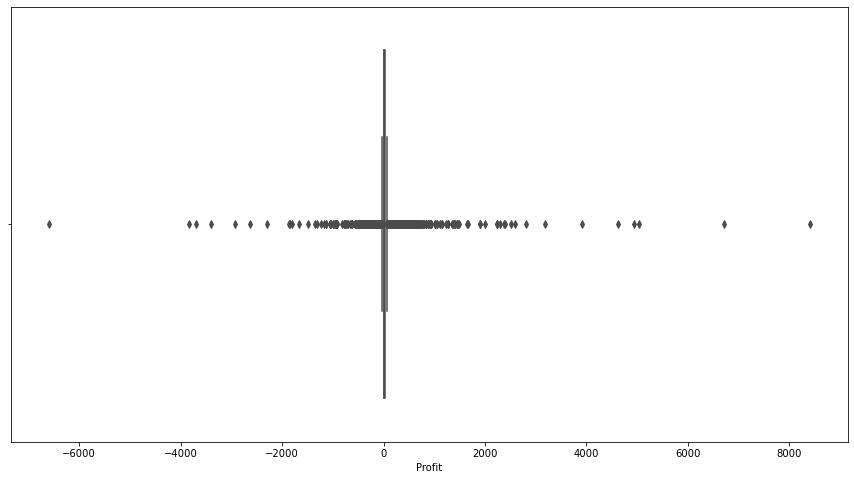

In [57]:
plt.figure(figsize = [15,8])
sns.boxplot(ss.Profit, color='red')
plt.show()

#### By seeing the above box plot we can say that there are products having extreme loss and profit.
#### We can't drop these extreme values because they can skew our analysis 

## 3. Profit Column

### LOSS RANGE 

### 1. 0 TO -500 :- VERY LOW
### 2. -500 TO -1000 :- LOW
### 3. -1000 TO -1500 :- MEDIUM
### 4. -1500 TO -2000 :- HIGH
### 5. ABOVE -2000 :- VERY HIGH

In [28]:
ss['Loss Range'] = pd.cut(ss.Profit, bins = [ -100000, -2000, -1500, -1000, -500, 0], 
                          labels = ['VERY HIGH','HIGH','MEDIUM','LOW','VERY LOW' ])

In [29]:
ss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,NaN
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,NaN
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,NaN
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,VERY LOW
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,NaN


In [30]:
ss['Loss Range'].value_counts()

VERY LOW     1884
LOW            28
MEDIUM         11
VERY HIGH       7
HIGH            4
Name: Loss Range, dtype: int64

## Segment wise Ananlysis

In [31]:
ss.Segment.value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [32]:
ss.groupby(['Segment']).agg(['mean','median'])

Sales          Quantity         Discount            Profit  \
                   mean  median      mean median      mean median       mean   
Segment                                                                        
Consumer     223.969279  53.952  3.761721    3.0  0.158308    0.2  25.855188   
Corporate    234.185781  56.704  3.844444    3.0  0.158159    0.2  30.499164   
Home Office  241.311234  52.680  3.784148    3.0  0.147178    0.0  33.883643   

                     
             median  
Segment              
Consumer     8.3754  
Corporate    8.6940  
Home Office  9.1160

### Which State, Region makes the most loss 

In [33]:
loss = ss[ss.Profit<0][['State','Region', 'Profit','Loss Range']]
loss.shape

(1869, 4)

In [34]:
loss.groupby(['Region','State'])[['Profit']].agg(['mean','median','max', 'min'])

Profit                                
                              mean     median       max        min
Region  State                                                     
Central Illinois        -76.753781  -17.58180   -0.6265 -2929.4845
        Texas           -75.747299  -17.26670   -0.2098 -3701.8928
East    Connecticut      -9.807300   -9.80730   -4.0320   -15.5826
        Delaware        -42.948150  -42.94815  -37.1124   -48.7839
        Maryland        -35.558500  -35.55850  -23.9372   -47.1798
        Massachusetts  -113.252340  -52.65820  -38.8500  -297.6848
        New Hampshire  -105.316400 -105.31640 -105.3164  -105.3164
        New Jersey      -25.645300  -25.64530  -19.9184   -31.3722
        New York       -107.045485  -66.23020   -4.8588  -553.6476
        Ohio           -104.509334  -19.23540   -0.6435 -6599.9780
        Pennsylvania    -77.708099  -20.06760   -0.3444 -1665.0522
        Rhode Island    -57.541950  -44.41590  -13.7568  -127.5792
        West Virginia   -76.953600  -76.95360  -76.9536   -76.9536
South   Florida         -68.966901  -11.67750   -0.6624 -1811.0784
        North Carolina -169.970374  -20.26860   -0.7748 -3839.9904
        Tennessee      -111.646422  -14.59200   -0.8392 -1237.8462
West    Arizona         -78.314912  -19.56240   -0.0895  -814.4832
        California      -35.901572  -17.45880   -0.8886  -325.5720
        Colorado       -134.862194  -16.34310   -0.6048 -3399.9800
        Nevada         -109.582200 -109.58220 -109.5822  -109.5822
        New Mexico       -5.694300   -5.69430   -5.6943    -5.6943
        Oregon          -67.220381  -18.18600   -0.3398  -384.7164
        Washington      -22.815918  -20.13620   -2.6997   -73.0548

In [35]:
ss[ (ss.Region=='Central') & (ss.Profit<-700)]

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
165,Standard Class,Consumer,San Antonio,Texas,Central,Technology,Machines,8159.952,8,0.4,-1359.9920,MEDIUM
1199,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464,HIGH
1995,Second Class,Consumer,Houston,Texas,Central,Office Supplies,Appliances,294.620,5,0.8,-766.0120,LOW
2846,Standard Class,Home Office,Chicago,Illinois,Central,Office Supplies,Binders,762.594,3,0.8,-1143.8910,MEDIUM
3324,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,896.990,5,0.8,-1480.0335,MEDIUM
4820,Standard Class,Consumer,San Antonio,Texas,Central,Office Supplies,Appliances,463.248,8,0.8,-1181.2824,MEDIUM
4991,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845,VERY HIGH
5198,Standard Class,Consumer,Round Rock,Texas,Central,Office Supplies,Supplies,3930.072,3,0.2,-786.0144,LOW
5310,First Class,Consumer,Houston,Texas,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820,VERY HIGH
6262,First Class,Corporate,Rockford,Illinois,Central,Office Supplies,Binders,442.372,7,0.8,-729.9138,LOW


### The most loss making region and states are: -
1. Central Region --> Illinois and Texas states
2. EASTERN region --> Ohio and Pennsylvania states
3. SOUTHERN region --> North Carolina,Tennessee and Florida states
4. WESTERN region --> Colorado state

## Let's explore and analyse Regionwise, segmentwise loss making 
1. CENTRAL region--> Illinois and Texas states
2. EASTERN region --> Ohio and Pennsylvania states
3. SOUTHERN region --> North Carolina and Florida states
4. WESTERN region --> Colorado state

### 1. Central Region

In [36]:
cent = ss[ (ss.Region=='Central') & (ss.State.isin(['Illinois','Texas']))]
cent

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,VERY LOW
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,VERY LOW
34,Second Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,29.4720,3,0.20,9.9468,NaN
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.5440,7,0.20,123.4737,NaN
36,First Class,Corporate,Richardson,Texas,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630,VERY LOW
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,VERY LOW
9922,Standard Class,Consumer,Chicago,Illinois,Central,Technology,Accessories,191.9680,4,0.20,28.7952,NaN
9961,First Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,65.5840,2,0.20,23.7742,NaN
9962,First Class,Home Office,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704,VERY LOW


In [37]:
cent.groupby(['Category','Sub-Category'])[['Profit','Discount','Sales']].agg(['mean','max','min','median'])

Profit                                 \
                                    mean       max        min    median   
Category        Sub-Category                                              
Furniture       Bookcases     -79.648927    0.0000  -437.5404  -46.9764   
                Chairs        -41.357015    0.0000  -350.4900  -20.2450   
                Furnishings   -43.077212   -0.7566  -427.4500  -12.0617   
                Tables       -127.969045   41.9340  -566.5625  -84.9615   
Office Supplies Appliances   -128.800615   -1.1100 -1181.2824  -67.6170   
                Art             4.215814   52.6320     0.3094    2.7246   
                Binders       -94.410177   -0.9452 -3701.8928  -11.0528   
                Envelopes      25.808037  204.0714     0.5508    9.3918   
                Fasteners       3.371097   21.8880    -3.7680    2.4864   
                Labels          6.461958   33.8310     0.6786    4.1760   
                Paper          17.487902  146.7900     1.1466    7.4000   
                Storage        -7.855106  124.9290  -172.7328    1.0098   
                Supplies      -31.686623    6.2064  -786.0144    0.6696   
Technology      Accessories    18.313285  135.4560   -33.3200    7.1313   
                Copiers       384.658678  874.9875   107.9946  335.9944   
                Machines     -130.044661  156.0470 -1359.9920   -5.2353   
                Phones         40.206143  376.1100   -87.6672   19.9567   

                              Discount                          Sales  \
                                  mean   max  min median         mean   
Category        Sub-Category                                            
Furniture       Bookcases     0.314595  0.32  0.3   0.32   507.463697   
                Chairs        0.300000  0.30  0.3   0.30   415.511374   
                Furnishings   0.600000  0.60  0.6   0.60    48.150000   
                Tables        0.370588  0.50  0.3   0.30   437.477078   
Office Supplies Appliances    0.800000  0.80  0.8   0.80    50.485582   
                Art           0.200000  0.20  0.2   0.20    30.551481   
                Binders       0.800000  0.80  0.8   0.80    58.524388   
                Envelopes     0.200000  0.20  0.2   0.20    76.704000   
                Fasteners     0.200000  0.20  0.2   0.20    12.805405   
                Labels        0.200000  0.20  0.2   0.20    18.801674   
                Paper         0.200000  0.20  0.2   0.20    50.613502   
                Storage       0.200000  0.20  0.2   0.20   190.799323   
                Supplies      0.200000  0.20  0.2   0.20   180.573538   
Technology      Accessories   0.200000  0.20  0.2   0.20   147.932070   
                Copiers       0.200000  0.20  0.2   0.20  1284.417778   
                Machines      0.372222  0.40  0.3   0.40  1294.584944   
                Phones        0.200000  0.20  0.2   0.20   371.814361   

                                                            
                                    max       min   median  
Category        Sub-Category                                
Furniture       Bookcases     2396.2656   67.9932  359.058  
                Chairs        2453.4300   37.2960  318.430  
                Furnishings    419.6800    1.8920   22.494  
                Tables        1218.7350   66.6450  355.455  
Office Supplies Appliances     463.2480    0.4440   24.588  
                Art            175.9200    1.3440   15.816  
                Binders       2177.5840    0.5560    6.881  
                Envelopes      604.6560    1.6320   28.360  
                Fasteners       58.3680    1.8240   10.824  
                Labels         100.2400    2.0880   11.784  
                Paper          419.4000    3.5280   21.720  
                Storage       1554.9360    8.7200   86.792  
                Supplies      3930.0720    1.7440   22.356  
Technology      Accessories   1399.9440    2.3760   80.780  
                Copiers       2799.

In [38]:
cent.describe()

,Sales,Quantity,Discount,Profit
count,1474.000000,1474.000000,1474.000000,1474.000000
mean,169.801275,3.772049,0.376757,-26.019426
std,392.234035,2.157638,0.243958,184.812799
min,0.444000,1.000000,0.200000,-3701.892800
25%,11.132000,2.000000,0.200000,-17.403750
50%,36.288000,3.000000,0.200000,-0.454300
75%,165.600000,5.000000,0.600000,6.588450
max,8159.952000,14.000000,0.800000,874.987500


## 2. EASTERN Region :- 

In [39]:
east = ss[ (ss.Region=='East') & (ss.State.isin(['Ohio','Pennsylvania']))]
east

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.372,2,0.3,-1.0196,VERY LOW
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522,HIGH
28,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Binders,9.618,2,0.7,-7.0532,VERY LOW
29,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Furnishings,124.200,3,0.2,15.5250,NaN
30,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Envelopes,3.264,2,0.2,1.1016,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Storage,36.744,3,0.2,3.6744,NaN
9945,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Office Supplies,Paper,3.424,1,0.2,1.0700,NaN
9946,Standard Class,Corporate,Philadelphia,Pennsylvania,East,Technology,Accessories,151.200,3,0.2,32.1300,NaN
9963,Same Day,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Paper,10.368,2,0.2,3.6288,NaN


In [40]:
east.groupby(['Category','Sub-Category'])[['Profit','Discount','Sales']].agg(['mean','max','min','median'])

Profit                                   \
                                    mean        max        min     median   
Category        Sub-Category                                                
Furniture       Bookcases    -236.433983   -15.6156 -1665.0522 -183.80150   
                Chairs        -45.357128     0.0000  -630.8820  -20.20340   
                Furnishings     7.269374   148.8450   -68.3920    6.40560   
                Tables       -171.099623   -15.4764  -734.5264 -106.39300   
Office Supplies Appliances     25.662398   312.6760     0.4440   10.64550   
                Art             3.050578    21.3408     0.1692    1.63240   
                Binders       -34.921889    -0.5964  -913.1760   -7.32550   
                Envelopes      20.390180   117.6147     1.1016   10.33650   
                Fasteners       3.230068    14.5348    -2.3814    2.14350   
                Labels          7.137306    33.8310     1.0738    5.27410   
                Paper          12.823363   146.7900     1.0700    6.42000   
                Storage       -19.891258    88.0299  -337.8060   -4.26050   
                Supplies      -81.182589     6.2550 -1049.3406   -0.69760   
Technology      Accessories    26.725441   607.6080   -75.5958    4.92795   
                Copiers       242.552800  1119.9968    69.9965  125.99720   
                Machines     -932.679353   -18.0385 -6599.9780 -337.63800   
                Phones        -58.585187    94.4937  -386.3916  -28.79640   

                             Discount                         Sales            \
                                 mean  max  min median         mean       max   
Category        Sub-Category                                                    
Furniture       Bookcases         0.5  0.5  0.5    0.5   406.025556  3083.430   
                Chairs            0.3  0.3  0.3    0.3   492.905241  4416.174   
                Furnishings       0.2  0.2  0.2    0.2   103.967636  1007.232   
                Tables            0.4  0.4  0.4    0.4   514.170968  2065.320   
Office Supplies Appliances        0.2  0.2  0.2    0.2   205.887304  1924.160   
                Art               0.2  0.2  0.2    0.2    25.218532   198.272   
                Binders           0.7  0.7  0.7    0.7    47.854649  1369.764   
                Envelopes         0.2  0.2  0.2    0.2    59.868800   348.488   
                Fasteners         0.2  0.2  0.2    0.2    12.843143    40.096   
                Labels            0.2  0.2  0.2    0.2    21.115111   100.240   
                Paper             0.2  0.2  0.2    0.2    37.264793   419.400   
                Storage           0.2  0.2  0.2    0.2   221.500744  1801.632   
                Supplies          0.2  0.2  0.2    0.2   378.369263  4663.736   
Technology      Accessories       0.2  0.2  0.2    0.2   176.388091  2025.360   
                Copiers           0.4  0.4  0.4    0.4  1879.978000  8399.976   
                Machines          0.7  0.7  0.7    0.7   740.797000  4499.985   
                Phones            0.4  0.4  0.4    0.4   315.021578  1931.958   

                                                  
                                  min     median  
Category        Sub-Category                      
Furniture       Bookcases      35.490   300.7225  
                Chairs         47.992   346.0870  
                Furnishings     2.960    51.1680  
                Tables         51.588   337.1760  
Office Supplies Appliances      3.552    98.6960  
                Art             1.504    13.2480  
                Binders         0.852     9.5220  
                Envelopes       3.264    31.1760  
                Fasteners       1.448    10.4400  
                Labels          3.304    16.2280  
                Paper           3.424    19.1360  
                Storage         8.384    80.3120  
                Supplies        3.488    15.8800  
Technology      Accessories     3.152    71.9760  
     

In [41]:
east.describe()

,Sales,Quantity,Discount,Profit
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,184.509607,3.706831,0.327135,-30.858369
std,461.110248,2.194358,0.189024,249.288788
min,0.852000,1.000000,0.200000,-6599.978000
25%,13.701000,2.000000,0.200000,-15.459950
50%,41.973000,3.000000,0.200000,0.722600
75%,159.720000,5.000000,0.400000,6.706300
max,8399.976000,14.000000,0.700000,1119.996800


## 3. SOUTHERN region --> North Carolina and Florida states

In [42]:
south = ss[ (ss.Region=='South') & (ss.State.isin(['North Carolina','Florida']))]
south

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,VERY LOW
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,NaN
12,Standard Class,Consumer,Concord,North Carolina,South,Office Supplies,Paper,15.5520,3,0.20,5.4432,NaN
43,Standard Class,Corporate,Melbourne,Florida,South,Office Supplies,Storage,95.6160,2,0.20,9.5616,NaN
83,Standard Class,Corporate,Durham,North Carolina,South,Office Supplies,Envelopes,200.9840,7,0.20,62.8075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9819,Standard Class,Corporate,Saint Petersburg,Florida,South,Office Supplies,Labels,9.0000,3,0.20,3.1500,NaN
9820,Standard Class,Corporate,Saint Petersburg,Florida,South,Office Supplies,Paper,42.2400,10,0.20,13.2000,NaN
9821,Standard Class,Corporate,Saint Petersburg,Florida,South,Office Supplies,Binders,18.2640,2,0.70,-13.3936,VERY LOW
9829,Standard Class,Consumer,Charlotte,North Carolina,South,Furniture,Chairs,242.3520,3,0.20,15.1470,NaN


In [43]:
south.groupby(['Category','Sub-Category'])[['Profit','Discount','Sales']].agg(['mean','max','min','median'])

Profit                                  \
                                    mean       max        min     median   
Category        Sub-Category                                               
Furniture       Bookcases     -17.837383   10.8588   -81.4410   -5.82960   
                Chairs          3.505510  131.2785  -182.6370    8.36880   
                Furnishings     8.254611   55.0160   -51.2940    5.61780   
                Tables       -325.124474  -36.1116 -1862.3124 -199.50760   
Office Supplies Appliances     23.869457  156.3380     0.5244    8.04800   
                Art             2.851920   12.3144     0.1533    1.79550   
                Binders       -46.296658   -0.8558 -1306.5504  -10.03720   
                Envelopes      14.151667   62.8075     0.9774    9.21780   
                Fasteners       4.263578   11.8140     0.6696    2.72220   
                Labels          7.868074   85.5297     0.9963    3.34080   
                Paper          19.906215  108.7408     1.6510   10.88640   
                Storage        -7.056478   84.2200  -337.8060    1.30800   
                Supplies      -17.354754    5.8653  -204.3145    0.34920   
Technology      Accessories    34.155276  303.8040   -75.5958   11.43800   
                Copiers       173.995933  311.9948    89.9970  119.99600   
                Machines     -736.081960   -1.9791 -3839.9904  -69.66375   
                Phones         36.314589  327.5922   -16.5528   19.96650   

                              Discount                          Sales  \
                                  mean   max  min median         mean   
Category        Sub-Category                                            
Furniture       Bookcases     0.200000  0.20  0.2   0.20   295.509333   
                Chairs        0.200000  0.20  0.2   0.20   463.080267   
                Furnishings   0.200000  0.20  0.2   0.20    83.898424   
                Tables        0.428947  0.45  0.4   0.45   798.247684   
Office Supplies Appliances    0.200000  0.20  0.2   0.20   219.885486   
                Art           0.200000  0.20  0.2   0.20    23.896582   
                Binders       0.700000  0.70  0.7   0.70    60.706981   
                Envelopes     0.200000  0.20  0.2   0.20    42.809600   
                Fasteners     0.200000  0.20  0.2   0.20    12.843556   
                Labels        0.200000  0.20  0.2   0.20    22.786370   
                Paper         0.200000  0.20  0.2   0.20    57.699126   
                Storage       0.200000  0.20  0.2   0.20   264.813268   
                Supplies      0.200000  0.20  0.2   0.20   105.379692   
Technology      Accessories   0.200000  0.20  0.2   0.20   203.664696   
                Copiers       0.200000  0.20  0.2   0.20   799.978667   
                Machines      0.500000  0.50  0.5   0.50  3719.459500   
                Phones        0.200000  0.20  0.2   0.20   394.886033   

                                                            
                                    max      min    median  
Category        Sub-Category                                
Furniture       Bookcases       723.920   77.728  265.5680  
                Chairs         2803.920   64.784  232.2680  
                Furnishings     410.352    2.784   44.0320  
                Tables         4297.644  154.764  562.2925  
Office Supplies Appliances     1158.120    5.200   64.3840  
                Art             172.704    1.344   13.6320  
                Binders        1633.188    1.167   12.8430  
                Envelopes       200.984    2.896   27.3120  
                Fasteners        31.504    1.984    8.3760  
                Labels          235.944    2.952    9.2160  
                Paper           310.688    4.624   31.0080  
                Storage        1801.632    4.464   95.6160  
                Supplies        961.480    2.944   20.6080  
Technology      Accessories    1012.680    2.376  111.1800  
               

## 4. WESTERN region --> Colorado state

In [44]:
west = ss[ (ss.Region=='West') & (ss.State.isin(['Colorado']))]
west

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
103,Standard Class,Consumer,Aurora,Colorado,West,Technology,Accessories,238.896,6,0.2,-26.8758,VERY LOW
104,Standard Class,Consumer,Aurora,Colorado,West,Furniture,Furnishings,102.360,3,0.2,-3.8385,VERY LOW
105,Standard Class,Consumer,Aurora,Colorado,West,Office Supplies,Binders,36.882,3,0.7,-25.8174,VERY LOW
201,First Class,Consumer,Denver,Colorado,West,Furniture,Tables,218.750,2,0.5,-161.8750,VERY LOW
202,First Class,Consumer,Denver,Colorado,West,Office Supplies,Appliances,2.600,1,0.2,0.2925,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9392,Same Day,Corporate,Denver,Colorado,West,Furniture,Chairs,582.336,8,0.2,-29.1168,VERY LOW
9553,Standard Class,Corporate,Broomfield,Colorado,West,Furniture,Furnishings,68.432,7,0.2,8.5540,NaN
9900,Standard Class,Consumer,Louisville,Colorado,West,Office Supplies,Storage,237.096,3,0.2,20.7459,NaN
9901,Standard Class,Consumer,Louisville,Colorado,West,Furniture,Furnishings,22.752,3,0.2,7.1100,NaN


In [45]:
west.groupby(['Category','Sub-Category'])[['Profit','Discount','Sales']].agg(['mean','max','min','median'])

Profit                                 \
                                     mean       max        min    median   
Category        Sub-Category                                               
Furniture       Bookcases     -267.657367  -98.8018  -786.7440 -190.8522   
                Chairs          39.751543  149.1480   -29.1168   45.4493   
                Furnishings      6.005663   78.8592   -24.5646    3.8412   
                Tables        -243.718850  -99.2664  -465.5680 -205.0205   
Office Supplies Appliances      15.713411   84.5728     0.2925    3.5100   
                Art              2.281300    9.3564     0.4752    1.1480   
                Binders        -13.553282   -0.7920   -62.8800   -8.6564   
                Envelopes        5.411940    7.4340     3.1842    5.2026   
                Fasteners        3.151350    9.2988    -0.6048    1.9557   
                Labels           2.991600    3.9474     2.0358    2.9916   
                Paper           15.715168   69.7050     2.0850    9.2500   
                Storage        -16.361523   20.7459   -95.8230  -15.9102   
                Supplies       -58.339800    5.9150  -299.8116    0.7300   
Technology      Accessories     14.970627   89.5888   -26.8758    1.3596   
                Copiers        164.997000  164.9970   164.9970  164.9970   
                Machines     -1461.418467  -45.9954 -3399.9800 -938.2800   
                Phones          32.694656  247.9960   -14.3400   14.8708   

                             Discount                         Sales            \
                                 mean  max  min median         mean       max   
Category        Sub-Category                                                    
Furniture       Bookcases         0.7  0.7  0.7    0.7   175.947000   590.058   
                Chairs            0.2  0.2  0.2    0.2   588.915429  1325.760   
                Furnishings       0.2  0.2  0.2    0.2    81.565333   508.704   
                Tables            0.5  0.5  0.5    0.5   364.282500   727.450   
Office Supplies Appliances        0.2  0.2  0.2    0.2   151.921778   845.728   
                Art               0.2  0.2  0.2    0.2    19.147636    83.168   
                Binders           0.7  0.7  0.7    0.7    18.177429    78.600   
                Envelopes         0.2  0.2  0.2    0.2    15.120000    21.240   
                Fasteners         0.2  0.2  0.2    0.2    11.130000    27.552   
                Labels            0.2  0.2  0.2    0.2     8.980000    11.696   
                Paper             0.2  0.2  0.2    0.2    46.485053   223.056   
                Storage           0.2  0.2  0.2    0.2   260.551385   636.408   
                Supplies          0.2  0.2  0.2    0.2   280.680000  1332.496   
Technology      Accessories       0.2  0.2  0.2    0.2   152.532800   447.944   
                Copiers           0.2  0.2  0.2    0.2   439.992000   439.992   
                Machines          0.7  0.7  0.7    0.7  1104.563000  2549.985   
                Phones            0.2  0.2  0.2    0.2   307.791000  1983.968   

                                                
                                  min   median  
Category        Sub-Category                    
Furniture       Bookcases      69.576  102.018  
                Chairs         83.136  580.736  
                Furnishings     4.224   24.800  
                Tables        145.980  291.850  
Office Supplies Appliances      2.600   43.560  
                Art             3.392   13.120  
                Binders         1.080   11.532  
                Envelopes       8.784   14.352  
                Fasteners       3.024    6.972  
                Labels          6.264    8.980  
                Paper           6.672   27.696  
                Storage        33.488  168.624  
                Supplies        5.840   10.944  
Technology      Accessories    46.688  102.336  
                Copiers       439.992  439.992  
           

## Analyzing profit making 

In [46]:
profit = ss[ss.Profit>0]
profit

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136,NaN
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820,NaN
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,NaN
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164,NaN
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028,NaN
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332,NaN
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932,NaN
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200,NaN


In [47]:
profit.groupby(['Region','Category'])[['Profit','Discount','Sales','Quantity']].agg(['mean','median','min','max'])

Profit                               Discount  \
                               mean    median     min        max      mean   
Region  Category                                                             
Central Furniture        106.719350  40.50135  1.3677   770.3520  0.001923   
        Office Supplies   40.635814   8.43120  0.1008  4946.3700  0.099808   
        Technology        99.929152  32.26410  0.2598  8399.9760  0.119459   
East    Furniture         53.548900  18.18360  0.5022  1013.1270  0.071814   
        Office Supplies   34.612978   9.33120  0.0636  1453.1238  0.076619   
        Technology       171.578114  42.99140  0.4728  5039.9856  0.056642   
South   Furniture         62.521463  20.39200  0.4176   746.4078  0.080150   
        Office Supplies   36.175279   9.19380  0.1134  3177.4750  0.081121   
        Technology       107.158184  32.98170  0.2997  2799.9840  0.083846   
West    Furniture         44.651504  20.58420  0.9612   629.0100  0.088447   
        Office Supplies   31.761324   9.61920  0.0628  1906.4850  0.065950   
        Technology        93.272583  31.54700  0.4356  6719.9808  0.119853   

                                               Sales                  \
                        median  min  max        mean   median    min   
Region  Category                                                       
Central Furniture          0.0  0.0  0.3  480.952628  245.960  2.910   
        Office Supplies    0.1  0.0  0.2  127.524801   28.000  1.344   
        Technology         0.2  0.0  0.4  398.540514  166.135  1.980   
East    Furniture          0.0  0.0  0.3  284.219980   95.209  2.960   
        Office Supplies    0.0  0.0  0.2  118.853680   29.610  1.240   
        Technology         0.0  0.0  0.4  548.449008  158.990  2.970   
South   Furniture          0.0  0.0  0.2  308.816772  129.930  2.784   
        Office Supplies    0.0  0.0  0.2  126.067104   31.400  1.344   
        Technology         0.0  0.0  0.2  415.639315  179.162  1.584   
West    Furniture          0.0  0.0  0.2  353.531260  143.432  3.480   
        Office Supplies    0.0  0.0  0.2  117.613259   31.200  1.344   
        Technology         0.2  0.0  0.2  445.484893  201.576  0.990   

                                    Quantity                 
                               max      mean median min max  
Region  Category                                             
Central Furniture         3504.900  3.923077    3.0   1  14  
        Office Supplies   9892.740  3.780230    3.0   1  14  
        Technology       17499.950  3.708108    3.0   1  12  
East    Furniture         4404.900  3.705882    3.0   1  14  
        Office Supplies   4355.168  3.797546    3.0   1  14  
        Technology       11199.968  3.659148    3.0   1  14  
South   Furniture         2573.820  3.853933    3.0   1  14  
        Office Supplies   6354.950  3.800244    3.0   1  14  
        Technology        8749.950  3.834615    3.0   1  14  
West    Furniture         3610.848  3.866913    3.0   1  14  
        Office Supplies   8187.650  3.788462    3.0   1  14  
        Technology       13999.960  3.911765    3.0   1  14

In [48]:
profit.groupby(['Region','Category','Sub-Category'])[['Profit','Discount','Sales']].agg(['mean','median','min','max'])

Profit                      \
                                            mean     median      min   
Region  Category        Sub-Category                                   
Central Furniture       Bookcases      73.008154   41.39280  20.9274   
                        Chairs        197.258691  104.82120   7.4592   
                        Furnishings    30.424454   14.84910   1.3677   
                        Tables        136.759314  108.86415  21.0980   
        Office Supplies Appliances    106.982566   54.27000   3.4086   
...                                          ...        ...      ...   
West    Office Supplies Supplies       15.166544    5.11800   0.0628   
        Technology      Accessories    69.986915   31.48950   0.4356   
                        Copiers       773.089404  434.99130  59.9980   
                        Machines      160.329110  116.24250   3.7570   
                        Phones         39.019979   23.75640   0.6930   

                                                 Discount                   \
                                            max      mean median  min  max   
Region  Category        Sub-Category                                         
Central Furniture       Bookcases      407.1288  0.000000    0.0  0.0  0.0   
                        Chairs         770.3520  0.000000    0.0  0.0  0.0   
                        Furnishings    387.5676  0.000000    0.0  0.0  0.0   
                        Tables         350.4270  0.013636    0.0  0.0  0.3   
        Office Supplies Appliances     793.7160  0.028571    0.0  0.0  0.1   
...                                         ...       ...    ...  ...  ...   
West    Office Supplies Supplies       327.5060  0.025000    0.0  0.0  0.2   
        Technology      Accessories    742.6320  0.023431    0.0  0.0  0.2   
                        Copiers       6719.9808  0.144000    0.2  0.0  0.2   
                        Machines       503.6400  0.200000    0.2  0.2  0.2   
                        Phones         363.9048  0.200000    0.2  0.2  0.2   

                                            Sales                               
                                             mean    median     min        max  
Region  Category        Sub-Category                                            
Central Furniture       Bookcases      413.924615   241.960  141.96   1565.880  
                        Chairs         809.352778   493.110   26.64   3504.900  
                        Furnishings    128.502537    47.400    2.91   1336.440  
                        Tables         787.857727   614.985  210.98   2678.940  
        Office Supplies Appliances     360.705339   196.938   13.11   2405.200  
...                                           ...       ...     ...        ...  
West    Office Supplies Supplies       258.787906    28.180    5.84   8187.650  
        Technology      Accessories    245.994259   119.800    0.99   3347.370  
                        Copiers       1989.969680  1199.976  299.99  13999.960  
                        Machines      1224.340903   686.320   11.56   4799.984  
                        Phones         384.929092   239.984    5.56   4158.912  

[68 rows x 12 columns]

## Now Analyzing Categorywise & Sub-Categorywise by dividing into 4 dataframes as per 4 Region

### 1. Eastern Region

In [49]:
pe = ss[ (ss.Profit>0) & (ss.Region == 'East')]
pe

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
29,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Furnishings,124.200,3,0.2,15.5250,NaN
30,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Envelopes,3.264,2,0.2,1.1016,NaN
31,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,86.304,6,0.2,9.7092,NaN
33,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Office Supplies,Art,15.760,2,0.2,3.5460,NaN
47,Standard Class,Consumer,Dover,Delaware,East,Technology,Accessories,45.000,3,0.0,4.9500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,Standard Class,Consumer,Plainfield,New Jersey,East,Office Supplies,Binders,735.980,2,0.0,331.1910,NaN
9969,Standard Class,Consumer,Plainfield,New Jersey,East,Office Supplies,Appliances,22.750,7,0.0,6.5975,NaN
9981,First Class,Consumer,Fairfield,Ohio,East,Office Supplies,Labels,16.520,5,0.2,5.3690,NaN
9984,Standard Class,Consumer,Long Beach,New York,East,Office Supplies,Labels,31.500,10,0.0,15.1200,NaN


In [50]:
pe.groupby(['Category','Sub-Category']).agg(['mean','median','min','max'])

Sales                                \
                                     mean    median      min        max   
Category        Sub-Category                                              
Furniture       Bookcases      682.780811   341.960   46.384   4404.900   
                Chairs         627.471038   383.607   60.740   3785.292   
                Furnishings     92.716181    47.040    2.960   1049.200   
                Tables         244.615000   244.615  244.615    244.615   
Office Supplies Appliances     271.337032   107.032    2.220   2625.120   
                Art             32.832298    14.790    1.504    289.200   
                Binders        168.456699    30.880    1.728   4355.168   
                Envelopes       59.133432    31.176    2.040    361.920   
                Fasteners       13.910393    11.600    1.240     40.670   
                Labels          24.326486    16.520    3.150    122.120   
                Paper           53.478537    25.920    3.380    447.840   
                Storage        301.344984    85.520    8.384   2934.330   
                Supplies        81.624435    26.455    4.360    835.170   
Technology      Accessories    230.668462    98.880    2.970   2309.650   
                Copiers       2660.973100  1139.976  479.984  11199.968   
                Machines      2499.736818  1542.405   52.440   9099.930   
                Phones         392.204697   209.970    4.950   4548.810   

                              Quantity                 Discount              \
                                  mean median min max      mean median  min   
Category        Sub-Category                                                  
Furniture       Bookcases     3.378378    3.0   1  12  0.091892    0.0  0.0   
                Chairs        4.095238    3.0   1  14  0.068571    0.1  0.0   
                Furnishings   3.607547    3.0   1  14  0.069434    0.0  0.0   
                Tables        1.000000    1.0   1   1  0.300000    0.3  0.3   
Office Supplies Appliances    3.761905    3.0   1  13  0.073016    0.0  0.0   
                Art           3.723684    3.0   1  10  0.069298    0.0  0.0   
                Binders       3.825279    3.0   1  13  0.133086    0.2  0.0   
                Envelopes     3.608108    3.0   1   9  0.081081    0.0  0.0   
                Fasteners     4.875000    4.0   1  14  0.082143    0.0  0.0   
                Labels        3.925234    3.0   1  11  0.067290    0.0  0.0   
                Paper         3.704787    3.0   1  14  0.064362    0.0  0.0   
                Storage       3.800000    3.0   1  13  0.042162    0.0  0.0   
                Supplies      3.543478    3.0   1  10  0.039130    0.0  0.0   
Technology      Accessories   3.516484    3.0   1  14  0.070330    0.0  0.0   
                Copiers       3.550000    3.5   1   9  0.250000    0.2  0.0   
                Machines      4.818182    4.0   1  11  0.000000    0.0  0.0   
                Phones        3.674286    3.0   1  14  0.027429    0.0  0.0   

                                       Profit                                 
                              max        mean     median      min        max  
Category        Sub-Category                                                  
Furniture       Bookcases     0.2   96.064932   46.97640   1.1596  1013.1270  
                Chairs        0.1  114.569688   64.75680   1.3098   609.7157  
                Furnishings   0.2   23.557602   11.51640   0.5022   272.7920  
                Tables        0.3   20.967000   20.96700  20.9670    20.9670  
Office Supplies Appliances    0.2   66.598519   22.01200   0.4440   735.0336  
                Art           0.2    8.333089    3.42240   0.1692    83.8680  
                Binders       0.2   64.087649   11.89100   0.6048  1453.1238  
                Envelopes     0.2   24.492014   14.08320   0.9588   162.8640  
                Fasteners     0.2    4.875468    3.22605   0.2353    18.2400  
      

### 2. Western region

In [51]:
pw = ss[ (ss.Profit>0) & (ss.Region == 'West')]
pw

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,NaN
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694,NaN
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656,NaN
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152,NaN
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.2208,NaN
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332,NaN
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932,NaN
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200,NaN


In [52]:
pw.groupby(['Category','Sub-Category']).agg(['mean','median','min','max'])

Sales                                \
                                     mean    median      min        max   
Category        Sub-Category                                              
Furniture       Bookcases      576.324823   339.490   48.580   3406.664   
                Chairs         564.803697   420.312   40.784   2676.672   
                Furnishings     95.823177    42.810    3.480   1049.200   
                Tables         908.518179   696.420   70.980   3610.848   
Office Supplies Appliances     222.326000    83.605    2.600   2518.290   
                Art             36.949020    14.700    1.408   1113.024   
                Binders        134.481543    26.192    1.344   5083.960   
                Envelopes       61.464179    22.920    4.080    419.900   
                Fasteners       12.908781     9.220    1.810     93.360   
                Labels          43.802835    18.450    2.610    786.480   
                Paper           59.902551    32.400    4.280    733.950   
                Storage        264.563678   126.830    5.980   1856.190   
                Supplies       258.787906    28.180    5.840   8187.650   
Technology      Accessories    245.994259   119.800    0.990   3347.370   
                Copiers       1989.969680  1199.976  299.990  13999.960   
                Machines      1224.340903   686.320   11.560   4799.984   
                Phones         384.929092   239.984    5.560   4158.912   

                              Quantity                 Discount              \
                                  mean median min max      mean median  min   
Category        Sub-Category                                                  
Furniture       Bookcases     3.916667    3.0   1  13  0.109375   0.15  0.0   
                Chairs        3.545455    3.0   1  12  0.200000   0.20  0.2   
                Furnishings   3.884354    3.0   1  14  0.027891   0.00  0.0   
                Tables        4.388060    3.0   1  13  0.119403   0.20  0.0   
Office Supplies Appliances    3.617647    3.0   1  14  0.030882   0.00  0.0   
                Art           3.702811    3.0   1  11  0.031325   0.00  0.0   
                Binders       3.885787    3.0   1  14  0.200000   0.20  0.2   
                Envelopes     3.388060    3.0   1   9  0.041791   0.00  0.0   
                Fasteners     3.640625    3.0   1  12  0.025000   0.00  0.0   
                Labels        4.139130    3.0   1  14  0.019130   0.00  0.0   
                Paper         3.794582    3.0   1  14  0.031603   0.00  0.0   
                Storage       3.881356    3.0   1  14  0.015254   0.00  0.0   
                Supplies      3.437500    3.0   1   7  0.025000   0.00  0.0   
Technology      Accessories   3.970711    3.0   1  14  0.023431   0.00  0.0   
                Copiers       3.520000    3.0   1   7  0.144000   0.20  0.0   
                Machines      3.774194    3.0   1  11  0.200000   0.20  0.2   
                Phones        3.911647    3.0   1  14  0.200000   0.20  0.2   

                                        Profit                                 
                               max        mean     median      min        max  
Category        Sub-Category                                                   
Furniture       Bookcases     0.15   53.690223   28.68350   3.4196   259.8896  
                Chairs        0.20   48.620945   33.49540   2.5980   267.6672  
                Furnishings   0.20   26.265624   13.02245   0.9612   297.6900  
                Tables        0.20  111.033946   44.70960   2.4898   629.0100  
Office Supplies Appliances    0.20   60.744632   22.66285   0.2925   654.7554  
                Art           0.20    9.521774    4.33680   0.1584   112.5740  
                Binders       0.20   46.501987    9.15120   0.4704  1906.4850  
                Envelopes     0.20   28.488991   10.86820   1.9176   197.3530  
                Fasteners     0.20    4.542019    3.53415   0.0792    21.5

### 3. Southern Region: -

In [53]:
ps = ss[ (ss.Profit>0) & (ss.Region == 'West')]
ps

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714,NaN
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694,NaN
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656,NaN
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152,NaN
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,Los Angeles,California,West,Technology,Accessories,36.240,1,0.0,15.2208,NaN
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332,NaN
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932,NaN
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200,NaN


In [54]:
ps.groupby(['Category','Sub-Category']).agg(['mean','median','min','max'])

Sales                                \
                                     mean    median      min        max   
Category        Sub-Category                                              
Furniture       Bookcases      576.324823   339.490   48.580   3406.664   
                Chairs         564.803697   420.312   40.784   2676.672   
                Furnishings     95.823177    42.810    3.480   1049.200   
                Tables         908.518179   696.420   70.980   3610.848   
Office Supplies Appliances     222.326000    83.605    2.600   2518.290   
                Art             36.949020    14.700    1.408   1113.024   
                Binders        134.481543    26.192    1.344   5083.960   
                Envelopes       61.464179    22.920    4.080    419.900   
                Fasteners       12.908781     9.220    1.810     93.360   
                Labels          43.802835    18.450    2.610    786.480   
                Paper           59.902551    32.400    4.280    733.950   
                Storage        264.563678   126.830    5.980   1856.190   
                Supplies       258.787906    28.180    5.840   8187.650   
Technology      Accessories    245.994259   119.800    0.990   3347.370   
                Copiers       1989.969680  1199.976  299.990  13999.960   
                Machines      1224.340903   686.320   11.560   4799.984   
                Phones         384.929092   239.984    5.560   4158.912   

                              Quantity                 Discount              \
                                  mean median min max      mean median  min   
Category        Sub-Category                                                  
Furniture       Bookcases     3.916667    3.0   1  13  0.109375   0.15  0.0   
                Chairs        3.545455    3.0   1  12  0.200000   0.20  0.2   
                Furnishings   3.884354    3.0   1  14  0.027891   0.00  0.0   
                Tables        4.388060    3.0   1  13  0.119403   0.20  0.0   
Office Supplies Appliances    3.617647    3.0   1  14  0.030882   0.00  0.0   
                Art           3.702811    3.0   1  11  0.031325   0.00  0.0   
                Binders       3.885787    3.0   1  14  0.200000   0.20  0.2   
                Envelopes     3.388060    3.0   1   9  0.041791   0.00  0.0   
                Fasteners     3.640625    3.0   1  12  0.025000   0.00  0.0   
                Labels        4.139130    3.0   1  14  0.019130   0.00  0.0   
                Paper         3.794582    3.0   1  14  0.031603   0.00  0.0   
                Storage       3.881356    3.0   1  14  0.015254   0.00  0.0   
                Supplies      3.437500    3.0   1   7  0.025000   0.00  0.0   
Technology      Accessories   3.970711    3.0   1  14  0.023431   0.00  0.0   
                Copiers       3.520000    3.0   1   7  0.144000   0.20  0.0   
                Machines      3.774194    3.0   1  11  0.200000   0.20  0.2   
                Phones        3.911647    3.0   1  14  0.200000   0.20  0.2   

                                        Profit                                 
                               max        mean     median      min        max  
Category        Sub-Category                                                   
Furniture       Bookcases     0.15   53.690223   28.68350   3.4196   259.8896  
                Chairs        0.20   48.620945   33.49540   2.5980   267.6672  
                Furnishings   0.20   26.265624   13.02245   0.9612   297.6900  
                Tables        0.20  111.033946   44.70960   2.4898   629.0100  
Office Supplies Appliances    0.20   60.744632   22.66285   0.2925   654.7554  
                Art           0.20    9.521774    4.33680   0.1584   112.5740  
                Binders       0.20   46.501987    9.15120   0.4704  1906.4850  
                Envelopes     0.20   28.488991   10.86820   1.9176   197.3530  
                Fasteners     0.20    4.542019    3.53415   0.0792    21.5

### 4. Central Region :-

In [55]:
pc = ss[ (ss.Profit>0) & (ss.Region == 'Central')]
pc

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Loss Range
16,Standard Class,Consumer,Madison,Wisconsin,Central,Office Supplies,Storage,665.880,6,0.0,13.3176,NaN
21,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Art,19.460,7,0.0,5.0596,NaN
22,Standard Class,Corporate,Fremont,Nebraska,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884,NaN
34,Second Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,29.472,3,0.2,9.9468,NaN
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9951,Second Class,Corporate,Indianapolis,Indiana,Central,Office Supplies,Binders,17.380,2,0.0,8.6900,NaN
9961,First Class,Home Office,Houston,Texas,Central,Office Supplies,Paper,65.584,2,0.2,23.7742,NaN
9972,Standard Class,Consumer,Houston,Texas,Central,Office Supplies,Envelopes,99.568,2,0.2,33.6042,NaN
9982,Standard Class,Consumer,Grand Rapids,Michigan,Central,Office Supplies,Paper,35.560,7,0.0,16.7132,NaN


In [56]:
pc.groupby(['Category','Sub-Category']).agg(['mean','median','min','max'])

Sales                                \
                                     mean    median      min        max   
Category        Sub-Category                                              
Furniture       Bookcases      413.924615  241.9600  141.960   1565.880   
                Chairs         809.352778  493.1100   26.640   3504.900   
                Furnishings    128.502537   47.4000    2.910   1336.440   
                Tables         787.857727  614.9850  210.980   2678.940   
Office Supplies Appliances     360.705339  196.9380   13.110   2405.200   
                Art             32.757614   17.4880    1.344    209.940   
                Binders        325.880150   33.4800    2.880   9892.740   
                Envelopes       78.591051   36.6000    1.632    604.656   
                Fasteners       14.355490   10.5280    1.810     58.368   
                Labels          32.256211   15.7120    2.088    491.550   
                Paper           54.634476   24.9000    3.528    629.100   
                Storage        225.594313   84.5500    8.720   1554.936   
                Supplies       206.508320   23.7600    2.920   4164.050   
Technology      Accessories    206.506784  112.2950    1.980   1928.780   
                Copiers       2328.723125  839.9800  319.984  17499.950   
                Machines       656.475833  415.4805   83.900   3059.982   
                Phones         369.895392  222.1820    5.500   2735.952   

                              Quantity                 Discount              \
                                  mean median min max      mean median  min   
Category        Sub-Category                                                  
Furniture       Bookcases     3.384615    3.0   1   7  0.000000    0.0  0.0   
                Chairs        4.259259    3.0   1  10  0.000000    0.0  0.0   
                Furnishings   3.835821    3.0   1  14  0.000000    0.0  0.0   
                Tables        3.681818    3.0   1   9  0.013636    0.0  0.0   
Office Supplies Appliances    4.196429    3.0   1  11  0.028571    0.0  0.0   
                Art           3.852273    3.0   1  14  0.122727    0.2  0.0   
                Binders       3.909774    3.0   1  13  0.000000    0.0  0.0   
                Envelopes     3.491525    3.0   1   9  0.128814    0.2  0.0   
                Fasteners     4.137255    4.0   1  12  0.133333    0.2  0.0   
                Labels        3.736842    3.0   1  10  0.113158    0.2  0.0   
                Paper         3.821317    3.0   1  13  0.128527    0.2  0.0   
                Storage       3.442177    3.0   1  10  0.093878    0.0  0.0   
                Supplies      3.200000    3.0   1   7  0.120000    0.2  0.0   
Technology      Accessories   4.033784    4.0   1  12  0.106757    0.2  0.0   
                Copiers       3.062500    2.5   1   7  0.112500    0.2  0.0   
                Machines      2.500000    2.5   2   3  0.283333    0.3  0.0   
                Phones        3.587629    3.0   1  11  0.119588    0.2  0.0   

                                       Profit                                  
                              max        mean     median       min        max  
Category        Sub-Category                                                   
Furniture       Bookcases     0.0   73.008154   41.39280   20.9274   407.1288  
                Chairs        0.0  197.258691  104.82120    7.4592   770.3520  
                Furnishings   0.0   30.424454   14.84910    1.3677   387.5676  
                Tables        0.3  136.759314  108.86415   21.0980   350.4270  
Office Supplies Appliances    0.1  106.982566   54.27000    3.4086   793.7160  
                Art           0.2    6.790677    3.59260    0.3094    54.5844  
                Binders       0.0  156.885422   16.15040    1.4112  4946.3700  
                Envelopes     0.2   30.127598   13.34800    0.5508   204.0714  
                Fasteners     0.2    4.809410    2.91450    0.1008    21.8